In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## ground truth

In [40]:
gt <- list()
for(i in seq(1,10)){
    load(sprintf("../04_simulation/GRCh38_Batches%d/sim_counts_matrix.rda", i))
    ct <- as.data.frame(counts_matrix) |> rownames_to_column("transcript") |>
       mutate(transcript = str_match(transcript, pattern = "(.+)::.+")[,2])|>
       rename_with(.fn = ~str_replace(.x, pattern = "sample_", replacement = "Sample"), .cols = starts_with("sample")) |> 
       pivot_longer(cols = starts_with("Sample"),names_to = "Sample",values_to = "Count" ) |> 
       mutate(Sample = paste0("Batch",i,".",Sample))
    gt[[ length(gt) + 1 ]] <- ct
}
    
gt <-    do.call(rbind,gt)

head(gt)

transcript,Sample,Count
<chr>,<chr>,<dbl>
MER11A:2661963:LEN,Batch1.Sample01,275
MER11A:2661963:LEN,Batch1.Sample02,232
MER11A:2661963:LEN,Batch1.Sample03,279
MER11A:2661963:LEN,Batch1.Sample04,321
MER11C:920729:LEN,Batch1.Sample01,34
MER11C:920729:LEN,Batch1.Sample02,24


## telescope 

In [122]:
ts <- list()
tsvg <- list()
ts_tel <- list()
tsvg_tel <- list()
ts_rm <- list()
tsvg_rm <- list()

for( b in seq(1,10)){
    for(s in seq(1,4)){
        ts[[length(ts) + 1]] <- read_tsv( sprintf("../05_telescope/Batch%d.Sample%02d-telescope_report.tsv",b, s) , col_names = TRUE, comment = "#", show_col_types = FALSE ) |>  
              select(transcript, final_count) |> rename(eCount = "final_count")  |> filter(eCount > 0) |> mutate(Sample = sprintf("Batch%d.Sample%02d", b,s), .before = eCount)
        tsvg[[length(tsvg) + 1]] <- read_tsv( sprintf("../05_telescope/Batch%d.Sample%02d.vg-telescope_report.tsv",b, s) , col_names = TRUE, comment = "#", show_col_types = FALSE) |>  
              select(transcript, final_count)  |> rename(eCount = "final_count") |> filter(eCount > 0)  |>mutate(Sample = sprintf("Batch%d.Sample%02d", b,s), .before = eCount)

        ts_tel[[length(ts_tel) + 1]] <- read_tsv( sprintf("../05_telescope/Batch%d.Sample%02d.tel-telescope_report.tsv.bed.count",b, s) , 
                                                         col_names = c("transcript","eCount","Source") , comment = "#", show_col_types = FALSE) |>  mutate(Sample = sprintf("Batch%d.Sample%02d", b,s),.before = eCount)
        tsvg_tel[[length(tsvg_tel) + 1]] <- read_tsv( sprintf("../05_telescope/Batch%d.Sample%02d.vg.tel-telescope_report.tsv.bed.count",b, s) ,
                                                     col_names = c("transcript","eCount","Source") , comment = "#", show_col_types = FALSE) |>  mutate(Sample = sprintf("Batch%d.Sample%02d", b,s),.before = eCount)

        ts_rm[[length(ts_tel) + 1]] <- read_tsv( sprintf("../05_telescope/Batch%d.Sample%02d.rm-telescope_report.tsv.bed.count",b, s) , 
                                                         col_names = c("transcript","eCount","Source") , comment = "#", show_col_types = FALSE) |>  mutate(Sample = sprintf("Batch%d.Sample%02d", b,s),.before = eCount)
        
        tsvg_rm[[length(tsvg_tel) + 1]] <- read_tsv( sprintf("../05_telescope/Batch%d.Sample%02d.vg.rm-telescope_report.tsv.bed.count",b, s) ,
                                                     col_names = c("transcript","eCount","Source") , comment = "#", show_col_types = FALSE) |>  mutate(Sample = sprintf("Batch%d.Sample%02d", b,s),.before = eCount)

        
    }
}

ts <-    do.call(rbind,ts)
tsvg <-    do.call(rbind,tsvg)
ts_tel <-    do.call(rbind,ts_tel)
tsvg_tel <-    do.call(rbind,tsvg_tel)

ts_rm <-    do.call(rbind,ts_rm)
tsvg_rm <-    do.call(rbind,tsvg_rm)


## my pipeline

In [101]:
my <- list()

for( b in seq(1,10)){
    for(s in seq(1,4)){
        my[[length(my) + 1]] <- read_tsv( sprintf("../06_reads_pairs/Batch%d.Sample%02d.assign.opt.tsv.bed.count",b, s) , 
         col_names = c("transcript","eCount","Source") , comment = "#",show_col_types = FALSE) |>  mutate(Sample = sprintf("Batch%d.Sample%02d", b,s),.before = eCount)
    }
}

my  <-    do.call(rbind,my)

In [72]:
table( cut(my$Count, breaks = seq(0, max(my$Count) + 10, by = 10), right = FALSE) )


   [0,10)   [10,20)   [20,30)   [30,40)   [40,50)   [50,60)   [60,70)   [70,80) 
      702       186       122       151       138       122       148       149 
  [80,90)  [90,100) [100,110) [110,120) [120,130) [130,140) [140,150) [150,160) 
      167       139       142       143       118       110       139       107 
[160,170) [170,180) [180,190) [190,200) [200,210) [210,220) [220,230) [230,240) 
      117       120       104       134       133       122        95       118 
[240,250) [250,260) [260,270) [270,280) [280,290) [290,300) [300,310) [310,320) 
      104        99       100        86        63        64        46        27 
[320,330) [330,340) [340,350) [350,360) [360,370) [370,380) [380,390) [390,400) 
       31        17        12         7         8         1         2         5 
[400,410) [410,420) [420,430) [430,440) [440,450) [450,460) [460,470) [470,480) 
        5         2         1         3         1         0         0         1 
[480,490) [490,500) [500,51

In [102]:
gt |> head()
my |> head()

transcript,Sample,Count
<chr>,<chr>,<dbl>
MER11A:2661963:LEN,Batch1.Sample01,275
MER11A:2661963:LEN,Batch1.Sample02,232
MER11A:2661963:LEN,Batch1.Sample03,279
MER11A:2661963:LEN,Batch1.Sample04,321
MER11C:920729:LEN,Batch1.Sample01,34
MER11C:920729:LEN,Batch1.Sample02,24


transcript,Sample,eCount,Source
<chr>,<chr>,<dbl>,<chr>
HERVK11:1881047:LEN,Batch1.Sample01,252,LTR|HERVK11-int|328872:LTR|MER11C|328871;LTR|HERVK11-int|328867:LTR|HERVK11-int|328868:LTR|HERVK11-int|328869:LTR|HERVK11-int|328870:LTR|MER11C|328866
HERVK11:272973:LEN,Batch1.Sample01,36,LTR|HERVK11-int|31111:LTR|HERVK11-int|31112:LTR|HERVK11-int|31113:LTR|MER11A|31110;LTR|MER11A|31114
HERVK11:4529181:LEN,Batch1.Sample01,77,LTR|HERVK11-int|816446:LTR|MER11C|816445;LTR|HERVK11-int|816443:LTR|HERVK11-int|816444
HERVK11:846473:LEN,Batch1.Sample01,184,LTR|HERVK11-int|170462:LTR|HERVK11-int|170465:LTR|MER11B|170463:LTR|MER11C|170464
HERVK13:384727:STR,Batch1.Sample01,162,LTR|HERVK13-int|94055:LTR|LTR13A|94056:LTR|LTR13A|94057
HERVK14:1280763:STR,Batch1.Sample01,102,LTR|HERVK14-int|224862:LTR|HERVK14-int|224864:LTR|HERVK14-int|224865:LTR|LTR14B|224863:LTR|MER52-int|224861


Joining with `by = join_by(transcript, Sample)`


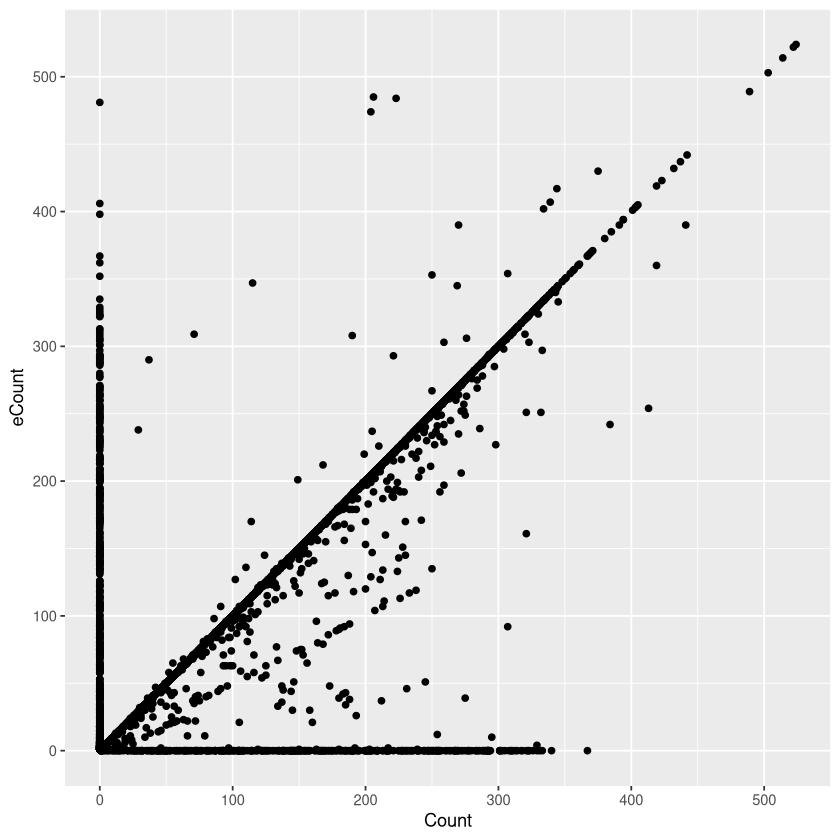

In [126]:
gt |> full_join(my) |>   mutate(across(c(Count, eCount), ~replace_na(., 0))) |> ggplot(aes(x= Count, y = eCount)) + geom_point()

Joining with `by = join_by(transcript, Sample)`
Joining with `by = join_by(transcript, Sample)`


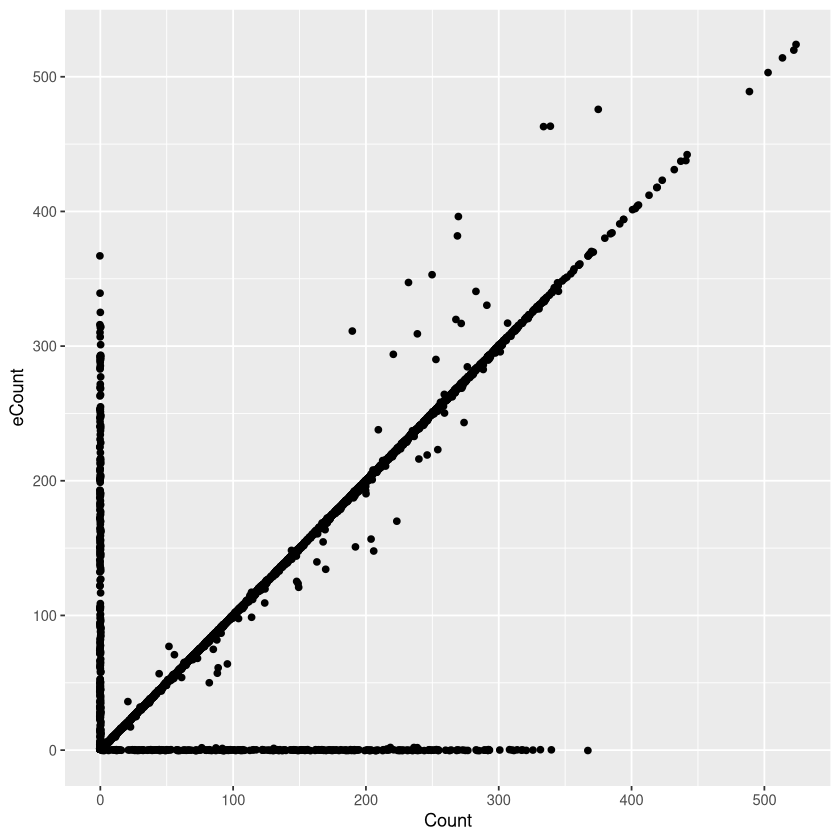

Joining with `by = join_by(transcript, Sample)`


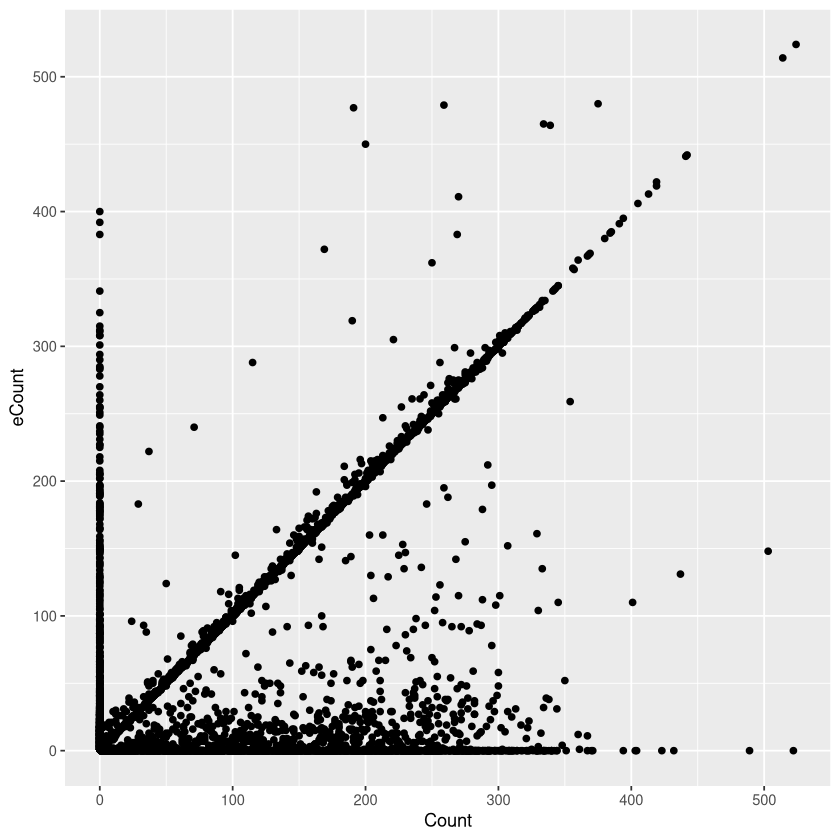

Joining with `by = join_by(transcript, Sample)`


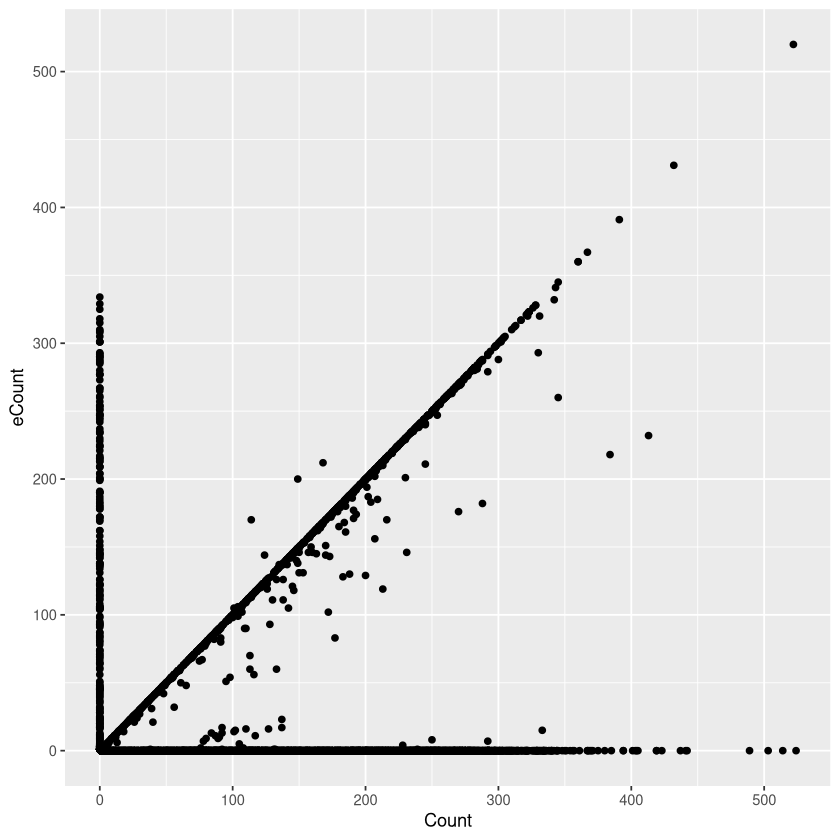

Joining with `by = join_by(transcript, Sample)`


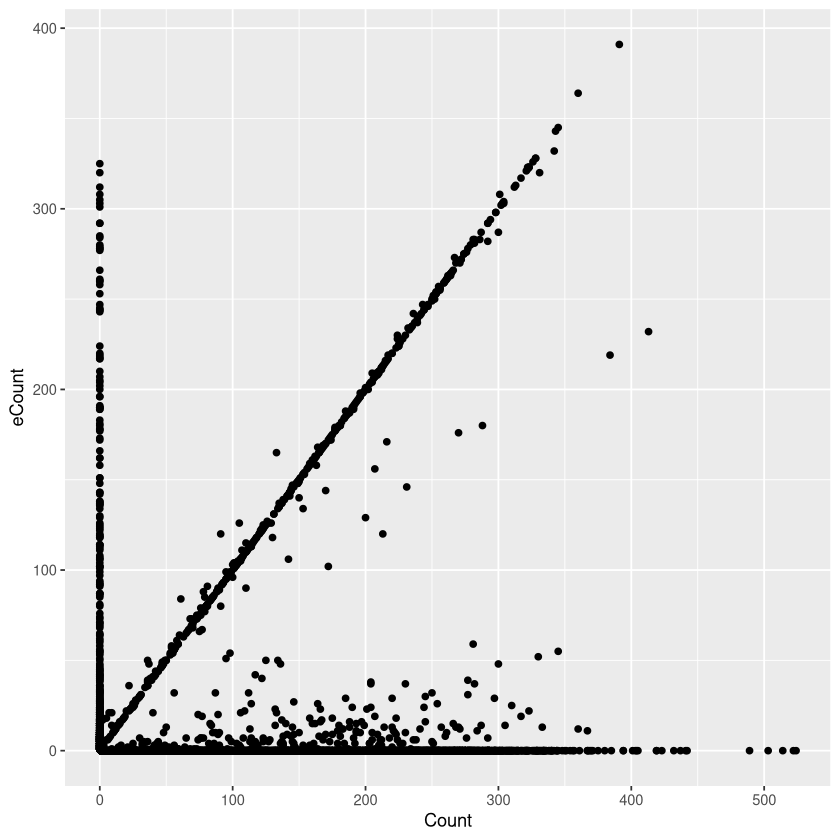

Joining with `by = join_by(transcript, Sample)`


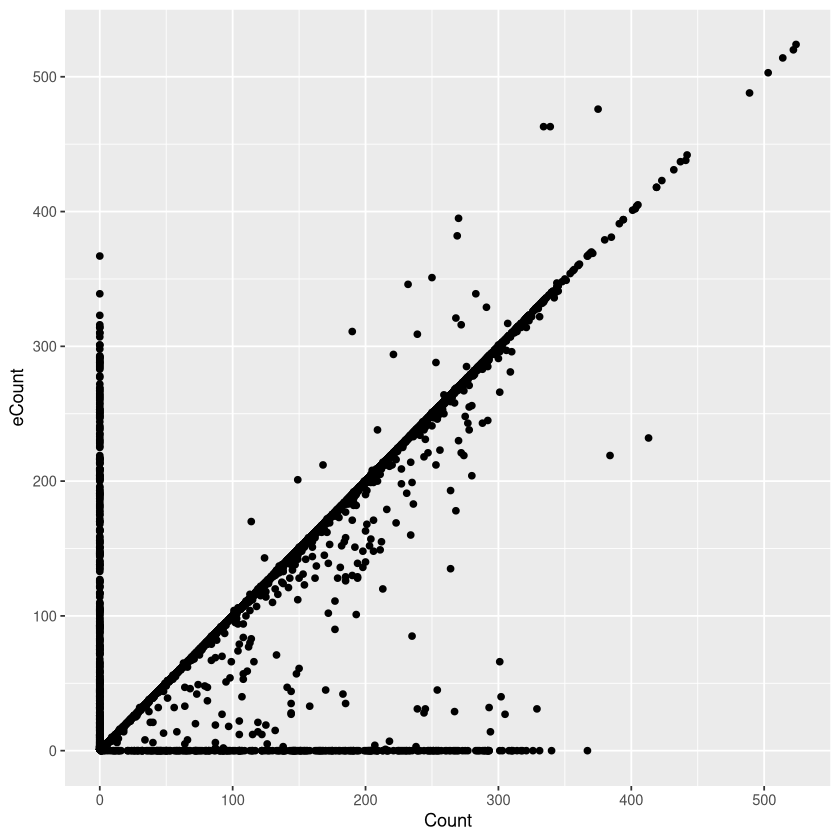

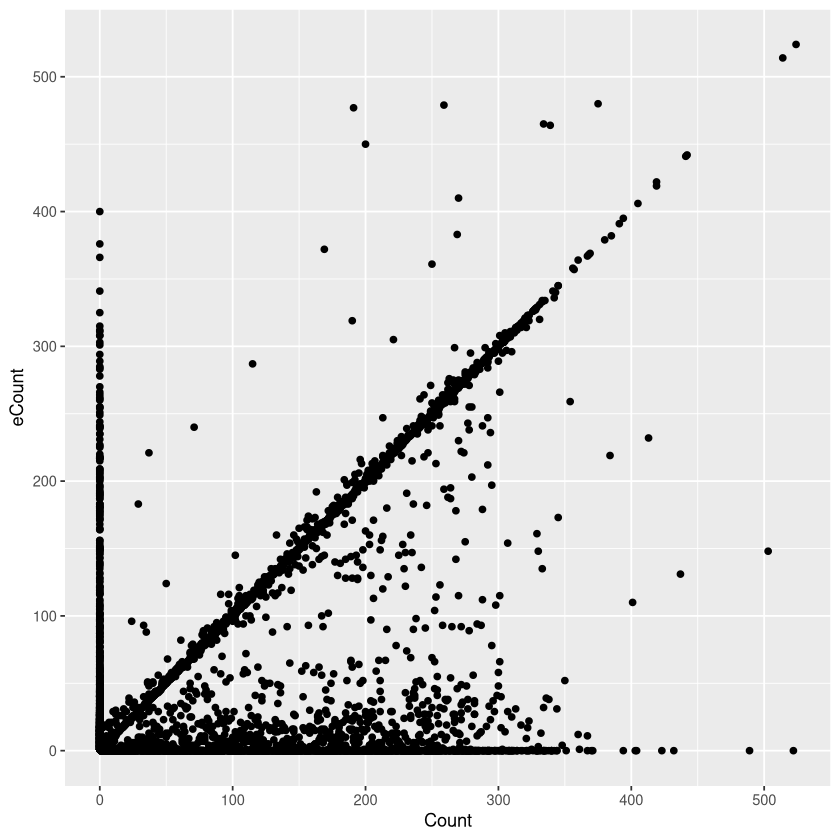

In [125]:
gt |> full_join(ts) |>   mutate(across(c(Count, eCount), ~replace_na(., 0))) |> ggplot(aes(x= Count, y = eCount)) + geom_jitter()
gt |> full_join(tsvg) |>   mutate(across(c(Count, eCount), ~replace_na(., 0))) |> ggplot(aes(x= Count, y = eCount)) + geom_point()
gt |> full_join(ts_tel) |>   mutate(across(c(Count, eCount), ~replace_na(., 0))) |> ggplot(aes(x= Count, y = eCount)) + geom_point()
gt |> full_join(tsvg_tel) |>   mutate(across(c(Count, eCount), ~replace_na(., 0))) |> ggplot(aes(x= Count, y = eCount)) + geom_point()
gt |> full_join(ts_rm) |>   mutate(across(c(Count, eCount), ~replace_na(., 0))) |> ggplot(aes(x= Count, y = eCount)) + geom_point()
gt |> full_join(tsvg_rm) |>   mutate(across(c(Count, eCount), ~replace_na(., 0))) |> ggplot(aes(x= Count, y = eCount)) + geom_point()


Joining with `by = join_by(transcript, Sample)`
Joining with `by = join_by(transcript, Sample)`


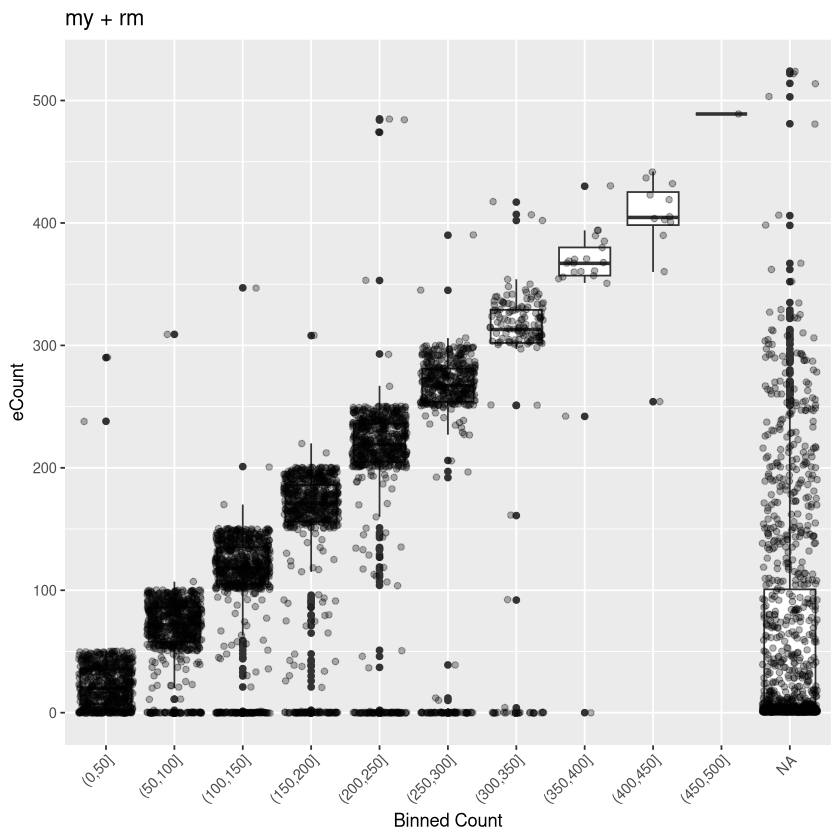

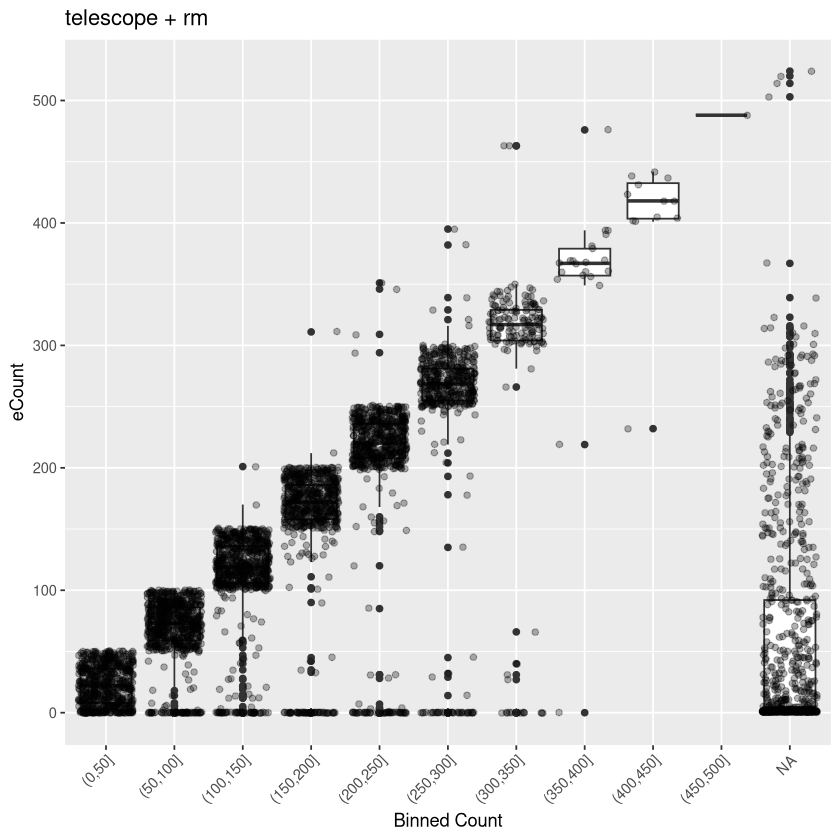

In [139]:
byn = 50
gt |> full_join(my) |>  mutate(
    across(c(Count, eCount), ~replace_na(., 0)),
    Count_bin = cut(Count, breaks = seq(0, max(Count), by = byn ))  # Bin width = 10
  ) |>
  ggplot(aes(x = Count_bin, y = eCount)) +
  geom_boxplot() + geom_jitter( alpha = 0.3) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Binned Count", y = "eCount", title = "my + rm")

gt |> full_join(ts_rm) |>   mutate(
    across(c(Count, eCount), ~replace_na(., 0)),
    Count_bin = cut(Count, breaks = seq(0, max(Count), by = byn))  # Bin width = 10
  ) |>
  ggplot(aes(x = Count_bin, y = eCount)) +
  geom_boxplot() + geom_jitter( alpha = 0.3) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Binned Count", y = "eCount",  title = "telescope + rm")


In [146]:
 my |> full_join(ts_rm, join_by( transcript == transcript , Sample == Sample) ) |> mutate(Diff = eCount.x - eCount.y, .after = Sample) |> arrange(desc(Diff))

transcript,Sample,Diff,eCount.x,Source.x,eCount.y,Source.y
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
MER11B:1570929:LEN,Batch6.Sample01,480,481,LTR|MER11C|274450:LTR|MER21C|274451,1,MER11B_1570929_240652
HERVK14:2417239:STR,Batch9.Sample01,367,398,LTR|HERVK14-int|423089:LTR|HERVK9-int|423088:LTR|HERVK9-int|423121:LTR|MER9a2|423106,31,MER9a2_2417240_369720
MER11B:584060:LEN,Batch6.Sample02,337,485,LTR|MER11C|126647:LTR|MER21C|126645:LTR|MER21C|126646,148,MER11B_584060_85597
HERVK14:2417239:STR,Batch9.Sample03,327,362,LTR|HERVK14-int|423089:LTR|HERVK9-int|423088:LTR|HERVK9-int|423121:LTR|MER9a2|423106,35,MER9a2_2417240_369720
MER11B:584060:LEN,Batch6.Sample03,317,474,LTR|MER11C|126647:LTR|MER21C|126645:LTR|MER21C|126646,157,MER11B_584060_85597
MER11B:584060:LEN,Batch6.Sample04,315,484,LTR|MER11C|126647:LTR|MER21C|126645:LTR|MER21C|126646,169,MER11B_584060_85597
HERVK14:2417239:STR,Batch9.Sample04,309,335,LTR|HERVK14-int|423089:LTR|HERVK9-int|423088:LTR|HERVK9-int|423121:LTR|MER9a2|423106,26,MER9a2_2417240_369720
HERVK9:479459:LEN,Batch3.Sample04,271,297,LTR|MER9a3|75167;LTR|HERVK9-int|75166:LTR|HERVK9-int|75168:LTR|HERVK9-int|75169:LTR|HERVK9-int|75170:LTR|HERVK9-int|75171:LTR|HERVK9-int|75172:LTR|HERVK9-int|75173:LTR|HERVK9-int|75175:LTR|MER9a3|75174,26,HERVK9-int_479460_70918
HERVK14:2417239:STR,Batch9.Sample02,266,291,LTR|HERVK14-int|423089:LTR|HERVK9-int|423088:LTR|HERVK9-int|423121:LTR|MER9a2|423106,25,MER9a2_2417240_369720


Joining with `by = join_by(transcript, Sample)`
Joining with `by = join_by(transcript, Sample)`


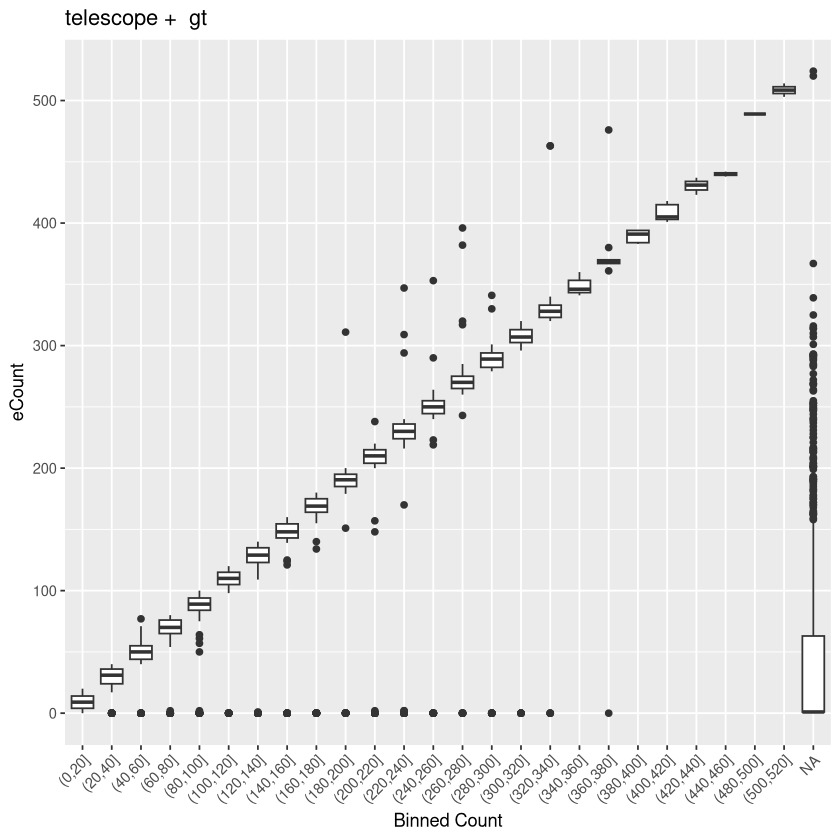

Joining with `by = join_by(transcript, Sample)`


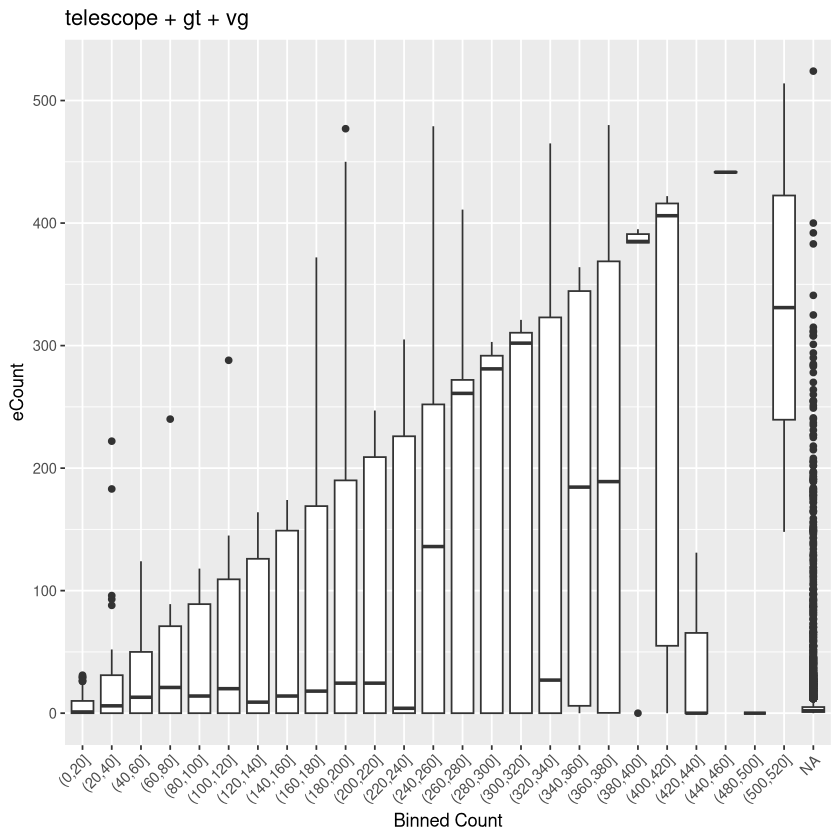

Joining with `by = join_by(transcript, Sample)`


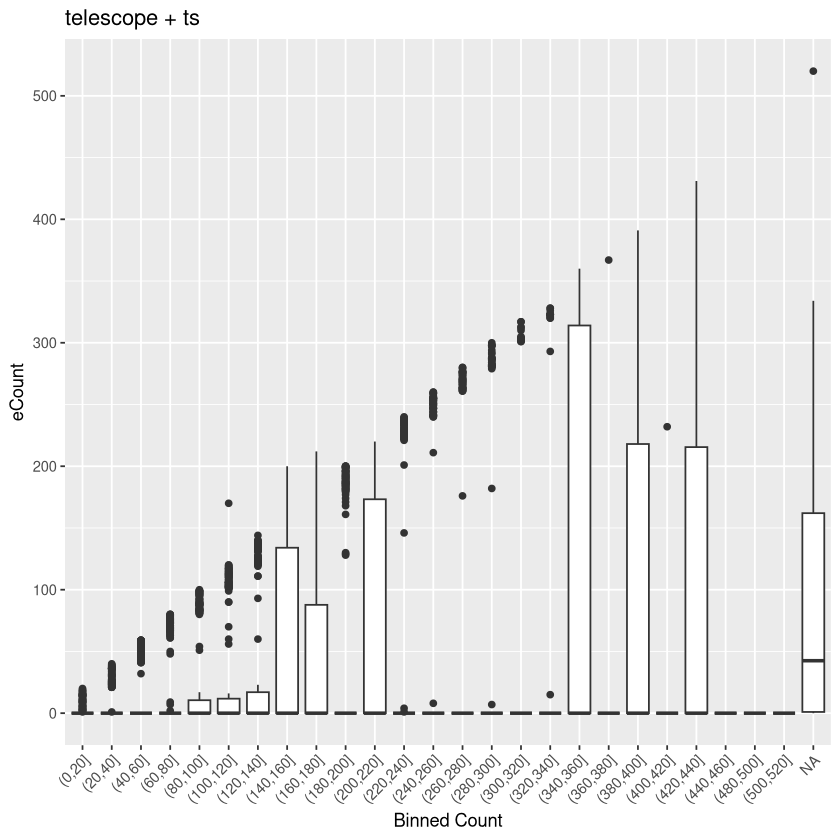

Joining with `by = join_by(transcript, Sample)`


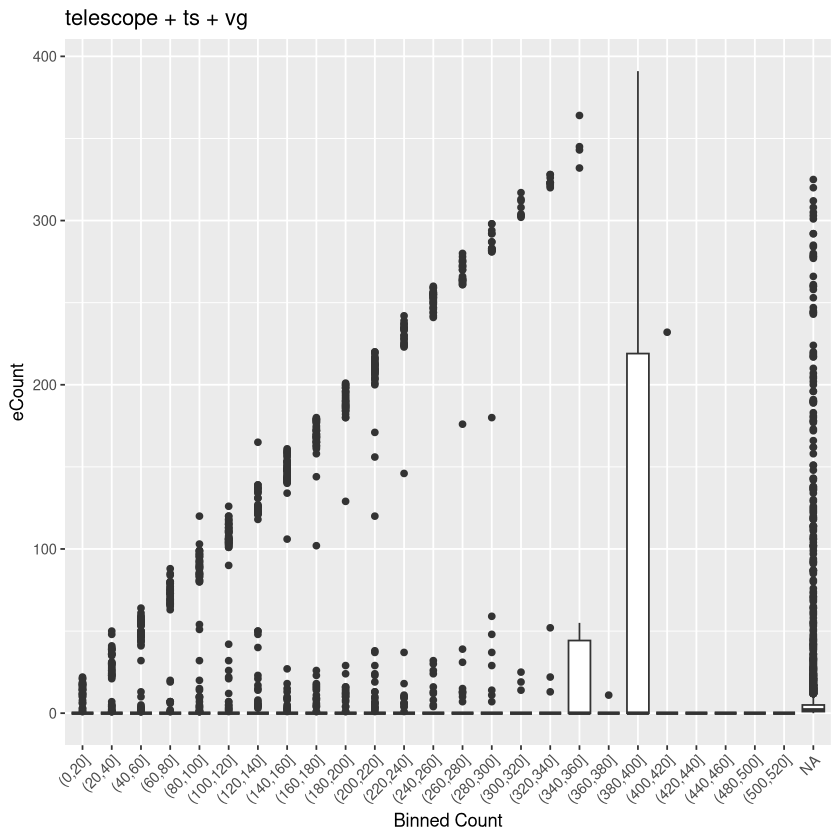

Joining with `by = join_by(transcript, Sample)`


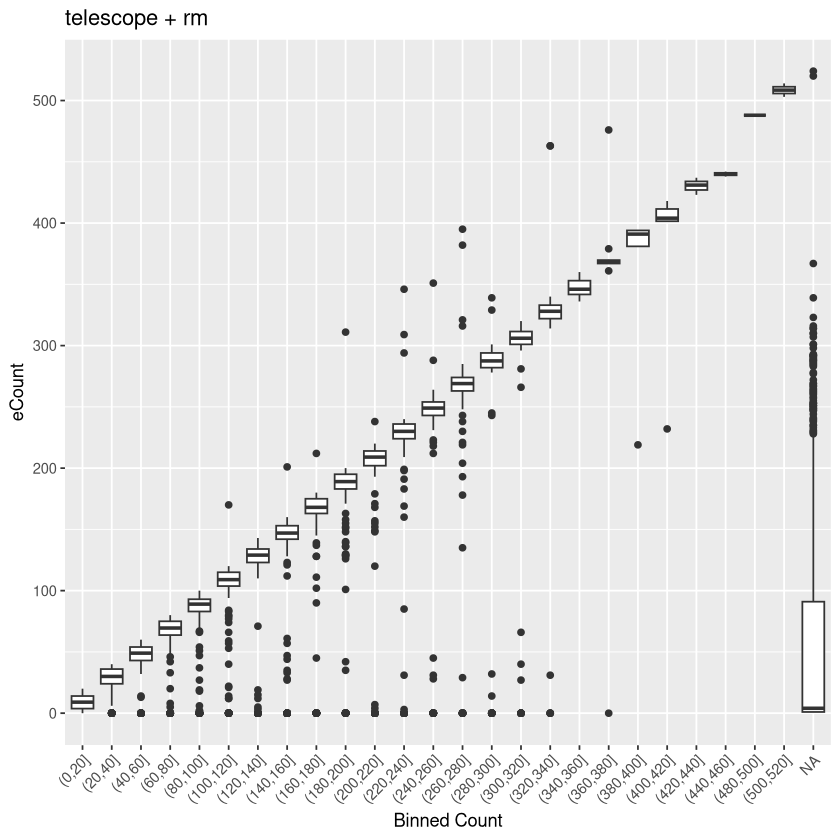

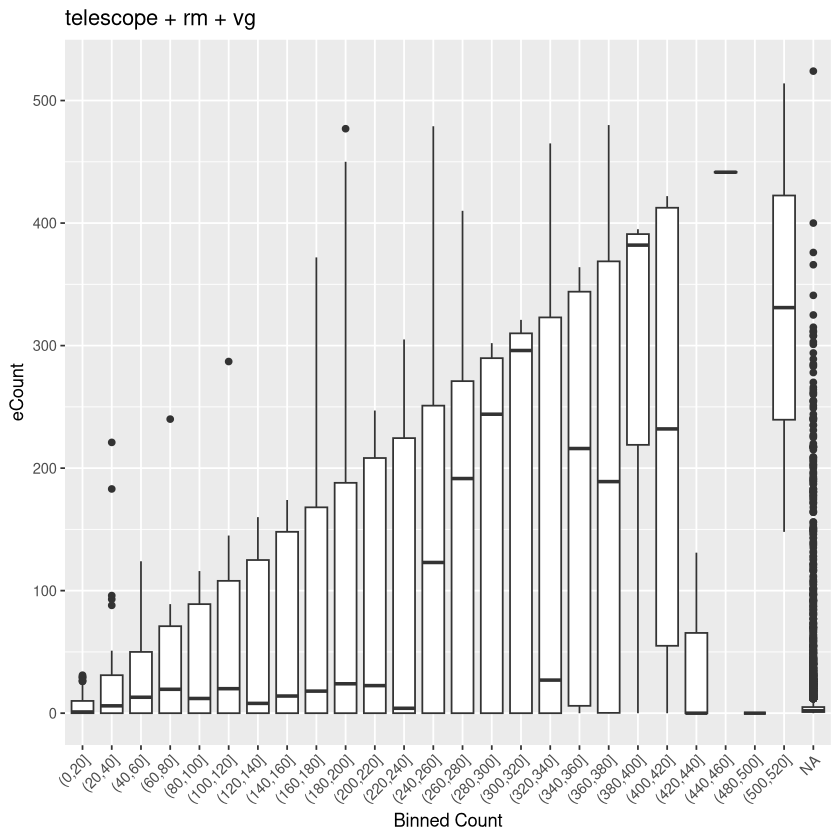

In [131]:

byn = 20

gt |> full_join(ts) |>    mutate(
    across(c(Count, eCount), ~replace_na(., 0)),
    Count_bin = cut(Count, breaks = seq(0, max(Count), by = byn))  # Bin width = 10
  ) |>
  ggplot(aes(x = Count_bin, y = eCount)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Binned Count", y = "eCount", title = "telescope +  gt" )

gt |> full_join(tsvg) |>  mutate(
    across(c(Count, eCount), ~replace_na(., 0)),
    Count_bin = cut(Count, breaks = seq(0, max(Count), by = byn))  # Bin width = 10
  ) |>
  ggplot(aes(x = Count_bin, y = eCount)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Binned Count", y = "eCount", title = "telescope + gt + vg")

gt |> full_join(ts_tel) |>   mutate(
    across(c(Count, eCount), ~replace_na(., 0)),
    Count_bin = cut(Count, breaks = seq(0, max(Count), by = byn))  # Bin width = 10
  ) |>
  ggplot(aes(x = Count_bin, y = eCount)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Binned Count", y = "eCount", title = "telescope + ts")

gt |> full_join(tsvg_tel) |>   mutate(
    across(c(Count, eCount), ~replace_na(., 0)),
    Count_bin = cut(Count, breaks = seq(0, max(Count), by = byn))  # Bin width = 10
  ) |>
  ggplot(aes(x = Count_bin, y = eCount)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Binned Count", y = "eCount", title = "telescope + ts + vg")


gt |> full_join(ts_rm) |>   mutate(
    across(c(Count, eCount), ~replace_na(., 0)),
    Count_bin = cut(Count, breaks = seq(0, max(Count), by = byn))  # Bin width = 10
  ) |>
  ggplot(aes(x = Count_bin, y = eCount)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Binned Count", y = "eCount",  title = "telescope + rm")


gt |> full_join(tsvg_rm) |>    mutate(
    across(c(Count, eCount), ~replace_na(., 0)),
    Count_bin = cut(Count, breaks = seq(0, max(Count), by = byn))  # Bin width = 10
  ) |>
  ggplot(aes(x = Count_bin, y = eCount)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Binned Count", y = "eCount",  title = "telescope + rm + vg")

In [123]:
dim(ts)


[1] 4416    3

In [124]:
dim(gt)

[1] 4000    3

In [17]:
as.data.frame(counts_matrix) |> rownames_to_column("transcript") |> mutate(transcript = str_match(transcript, pattern = "(.+)::.+")[,2])|>
  rename_with(.fn = ~str_replace(.x, pattern = "sample_", replacement = "Sample"), .cols = starts_with("sample")) |> 
  pivot_longer(cols = starts_with("Sample"),names_to = "Sample",values_to = "Count" ) |> mutate(Sample = paste0("Batch",i,".",Sample))

transcript,Sample,Count
<chr>,<chr>,<dbl>
MER11A:2661963:LEN,Batch1.Sample01,275
MER11A:2661963:LEN,Batch1.Sample02,232
MER11A:2661963:LEN,Batch1.Sample03,279
MER11A:2661963:LEN,Batch1.Sample04,321
MER11C:920729:LEN,Batch1.Sample01,34
MER11C:920729:LEN,Batch1.Sample02,24
MER11C:920729:LEN,Batch1.Sample03,12
MER11C:920729:LEN,Batch1.Sample04,9
HERVK:4418839:STR,Batch1.Sample01,28


In [16]:
i = 1

In [28]:
load("../04_simulation/Batch1_GRCh38/sim_counts_matrix.rda")

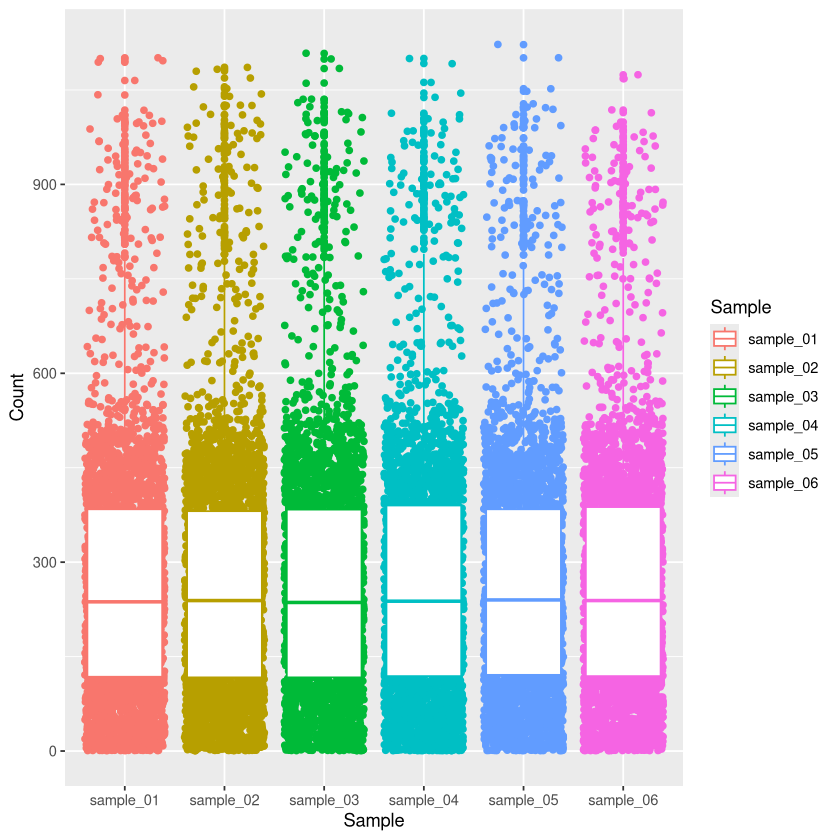

In [30]:
as.data.frame(counts_matrix) |> rownames_to_column("TEs") |> 
   pivot_longer(cols = starts_with("sample"), names_to = "Sample", values_to = "Count") |> 
  ggplot(aes(Sample, Count, color = Sample)) + geom_jitter()  + geom_boxplot()

In [46]:
counts_sim <- as.data.frame(counts_matrix) |> rownames_to_column("transcript") |> mutate(transcript = str_match(transcript, pattern = "(.+)::.+")[,2])

## telescope results

In [55]:
counts_tele <- read_tsv("../05_telescope//GRCh38.01-telescope_report.tsv", skip = 1) |> select(transcript, final_count)

counts_tele <- counts_tele |> left_join(counts_sim) 

head(counts_tele)

Rows: 3033 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): transcript
dbl (10): transcript_length, final_count, final_conf, final_prop, init_align...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(transcript)`


transcript,final_count,sample_01,sample_02,sample_03,sample_04,sample_05,sample_06
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HERVK9:3424723:LEN,2726,758,819,816,431,369,421
LTR13:1936114:LEN,2666,80,70,119,185,156,233
HERVK3:3426631:STR,2645,395,351,398,485,323,382
HERVK22:3427497:STR,2018,218,127,238,183,155,190
MER11C:3426621:LEN,1864,271,216,224,164,240,261
MER11B:1829722:LEN,1714,475,427,427,429,421,432


In [56]:
counts_tele |> summarise(correlation = cor(final_count, sample_01, method = "pearson"))

correlation
<dbl>
NA


In [75]:
cor(counts_tele$final_count,counts_tele$sample_01,use = "complete.obs", method = "pearson")

[1] 0.8193752

In [59]:
counts_tele$sample_01

[1]  758   80  395  218  271  475  549  988  842   17   81 1065  174  716
  [15]  978  482  518  656 1100  272 1096 1094  423 1101 1042  847  469  193
  [29] 1018 1004 1010 1010  999  997  997  395  993  871  969  968  965  964
  [43]  957  954  951  945  945  950  940  929  815  939  234  935  933  928
  [57]  925  923  310  917  915  910  911  461  905  904  900  498  864  899
  [71]  897  428  892  547  882  305  886   43  883  257  878  879  872  876
  [85]  874  862  861  860  860  851  850  844  843  843  836   70   85  345
  [99]  739  828  827  507  493  822  816  816  814  816  811  807  463  805
 [113]  805  406  253  363  791  785  786  784  781  779   85  693  776  713
 [127]  770  768  768  766  568   97  416  262  756  751  739  324  735  733
 [141]  388  729  347  642  619  149  391  717  715  337  712  228  703  700
 [155]  135  686  709  449  327  178  678  291  677  675  675  642  674  671
 [169]  375  189  662  496  654  164  555  641  640  412  631  633  631  629
 [183]  532  627  626  136  619  617  480  610  608  297  606  605  375  341
 [197]  600  596  541  483  498  583  588  585  583  582  247  577  575  338
 [211]  568  473  567  563  562  278  561  561  558  558  446  196  556  556
 [225]  555  554  483  551  552  388  550  550  551  549  549  428  544  543
 [239]  544  543  543  157  543  541  541  394  542  537  537  537  529  534
 [253]  483  496  533  530  171  144  527  277  185  528  528  525  516  525
 [267]  524  524  388  522  522  155  396  520  476  519  521  342  368  516
 [281]  519  518  518  517  515  353  514  514  513  510  512  512  511  511
 [295]  511  261  509  509  506  508  510  508  505  505  504  504  504  503
 [309]  502  502  501  491  502  502  481  501  501  500  500  503  499  499
 [323]  501  499  498  498  481  497  497  497  496  291  495  496  495  494
 [337]  490  494  494  493  493  493  493  493  492  491  476  491  491  491
 [351]  499  490  491  490  245  489  488  488  488  487  487  487  486  487
 [365]  485  485  484  461  484  483  483  473  482  482  482  481  479  480
 [379]  480  207  471  480  480  481  482  479  480  455  479  478  477  477
 [393]  479  477  476  458  475  475  476  132  474  473  474  473  472  472
 [407]  471  470  471  472  472  470  470  470  470  470  465  418  469  469
 [421]  469  468  469  468  467  468  467  468  466  465  466  467  304  465
 [435]  466  447  465  138  464  464  464  463  464  463  463  463  463  464
 [449]  462  462  454   76  462  461  461  462  460  460  459  459  458  458
 [463]  437  457  457  394  456  456  457  456  456  454  454  454  456  454
 [477]  454  455  452  453  453  453  453  453  452  452  452  452  452  452
 [491]  452  452  451  451  453  449  449  449  449  449  449  334  448  448
 [505]  448  448  448  447  446  446  441  446  446  446  445  447  444  444
 [519]  407  444  444  446  442  443  443  442  442  442  442  440  436  443
 [533]  442  441  441  441  440  440  439  440  439  439  439  440  439  438
 [547]  438  297  437  438  438  399  437  437  437  439  436  436  436   48
 [561]  435  435  432  435  435  434  434  434  433  435  433  432  432  427
 [575]  432  430  430  429  427  430  429  420  428  428  428  427  427  427
 [589]  426  426  426  426  426  427  426  426  425  425  425  420  425  425
 [603]  425  425  425  424  424  424  424  424  422  424  423  423  421  422
 [617]  422  425  422  421  421  421  375  420  421  418  420  420  420  419
 [631]  419  419  419  419  419  414  418  418  419  417  418  418  418  413
 [645]  417  413  416  416  416  416  416  416  416  416  415  415  414  265
 [659]  414  398  414  415  413  413  413  413  339   NA  412  412  394  411
 [673]  412  411  409  412  411  410  410  396  306  409  409  407  409  408
 [687]  408  408  408  408  308  407  407  406  407  407  401  407  405  406
 [701]  405  404  405  405  405  405  405  405  405  405  406  404  405   25
 [715]  404  403  403  348  403  403  400  404  402  452  403  402  398  398

## pangenome

In [89]:
counts_pan <- read.table("../02_quant//GRCh38.S01.counts.opt.tsv.bed.count")|> set_names("transcript","pan_count") |> right_join(counts_sim) 
#counts_pan$pan_count[is.na(counts_pan$pan_count)] <-0
head(counts_pan)

Joining with `by = join_by(transcript)`


,transcript,pan_count,sample_01,sample_02,sample_03,sample_04,sample_05,sample_06
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LTR5A:1199368:LEN,272,269,313,300,281,287,289
2,MER11C:815109:LEN,501,500,503,455,525,522,526
3,MER11C:2573492:LEN,779,779,722,840,166,167,177
4,MER11B:1818879:LEN,457,457,325,308,810,835,648
5,HERVKC4:1492586:STR,1444,988,1026,1004,476,587,464
6,HERVK14:3158403:STR,348,351,323,375,390,362,398


In [90]:
cor(counts_pan$pan_count,counts_pan$sample_01, use = "complete.obs", method = "pearson")

[1] 0.7236088

In [86]:
table(is.na(counts_pan$pan_count))


FALSE 
 3219 